<a href="https://colab.research.google.com/github/farsashraf/OOP/blob/main/changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [920]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [921]:
data = pd.read_csv('yaret.csv')
data.head()

,age,sex,city,pref_Hobby,pref_donation,another_type_donation,donate_way,donate_number,income
0,15,f,Kafr El-Sheikh,read,education,things,online,1,3000
1,54,m,Giza,sports,health,time,himself,3,5000
2,31,f,the new Valley,music,Poverty,skills,mobile,2,4000
3,17,f,Western,rarts,environment,knowledge,email,5,3500
4,34,f,Menoufia,music,health,things,mobile,4,6000


In [922]:
data.describe()

,age,donate_number,income
count,9999.000000,9999.000000,9999.000000
mean,37.422042,22.914891,14810.871087
std,13.264203,19.749771,10928.195914
min,15.000000,1.000000,1500.000000
25%,26.000000,12.000000,7300.000000
50%,37.000000,19.000000,11500.000000
75%,49.000000,27.000000,21400.000000
max,60.000000,95.000000,50000.000000


In [923]:
data.shape

(9999, 9)

In [924]:
data.count().isnull()

age                      False
sex                      False
city                     False
pref_Hobby               False
pref_donation            False
another_type_donation    False
donate_way               False
donate_number            False
income                   False
dtype: bool

In [925]:
cols_name = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
data.columns = cols_name
data.head()

,age,sex,city,pref_hobby,pref_donate,donate_type,donate_way,donate_number,income
0,15,f,Kafr El-Sheikh,read,education,things,online,1,3000
1,54,m,Giza,sports,health,time,himself,3,5000
2,31,f,the new Valley,music,Poverty,skills,mobile,2,4000
3,17,f,Western,rarts,environment,knowledge,email,5,3500
4,34,f,Menoufia,music,health,things,mobile,4,6000


In [926]:
data_cleaning = data.drop_duplicates(subset=['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income'])
data_cleaning.shape

(9999, 9)

In [927]:
data.drop(['sex', 'pref_hobby', 'donate_way'], axis = 1, inplace =True)
data.head()

,age,city,pref_donate,donate_type,donate_number,income
0,15,Kafr El-Sheikh,education,things,1,3000
1,54,Giza,health,time,3,5000
2,31,the new Valley,Poverty,skills,2,4000
3,17,Western,environment,knowledge,5,3500
4,34,Menoufia,health,things,4,6000


In [928]:
df = pd.DataFrame(data)

onehot_encoder = OneHotEncoder(sparse=False)

columns_to_encode = ['city', 'pref_donate', 'donate_type']

encoded_data = onehot_encoder.fit_transform(df[columns_to_encode])

encoded_feature_names = onehot_encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

x_train = pd.concat([df, encoded_df], axis=1)

x_train.drop(columns=columns_to_encode, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [929]:
print(x_train)

      age  donate_number  income  city_Alexandria  city_Aswan  city_Asyut  \
0      15              1    3000              0.0         0.0         0.0   
1      54              3    5000              0.0         0.0         0.0   
2      31              2    4000              0.0         0.0         0.0   
3      17              5    3500              0.0         0.0         0.0   
4      34              4    6000              0.0         0.0         0.0   
...   ...            ...     ...              ...         ...         ...   
9994   60              2    4500              0.0         0.0         0.0   
9995   17             15   11500              0.0         0.0         0.0   
9996   47              3   12500              0.0         1.0         0.0   
9997   47             93   14000              0.0         0.0         0.0   
9998   18             21   13000              0.0         0.0         0.0   

      city_Bani Sweif  city_Cairo  city_Damietta  city_Eastern  ...  \
0   

In [930]:
x_train.drop(['age'], axis = 1, inplace =True)

In [931]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_train)
x_scaled

array([[0.        , 0.03092784, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0212766 , 0.07216495, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0106383 , 0.05154639, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.0212766 , 0.22680412, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.9787234 , 0.25773196, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.21276596, 0.2371134 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [932]:
pca = PCA(n_components= 2, random_state=42)
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[ 0.55245677,  0.87944223],
       [-0.39926224,  0.00340971],
       [ 0.11186607, -0.21447219],
       ...,
       [ 0.15813005,  0.67054745],
       [ 0.10956574, -0.20664541],
       [ 0.32550503, -0.73284303]])

In [933]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

def elbow_method(data1, max_k):
    means= []
    inertias= []
    for k in range(1, max_k):
      km = KMeans(n_clusters=k)
      km.fit(data1)
      means.append(k)
      inertias.append(km.inertia_)

    fig = plt.subplots(figsize =(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

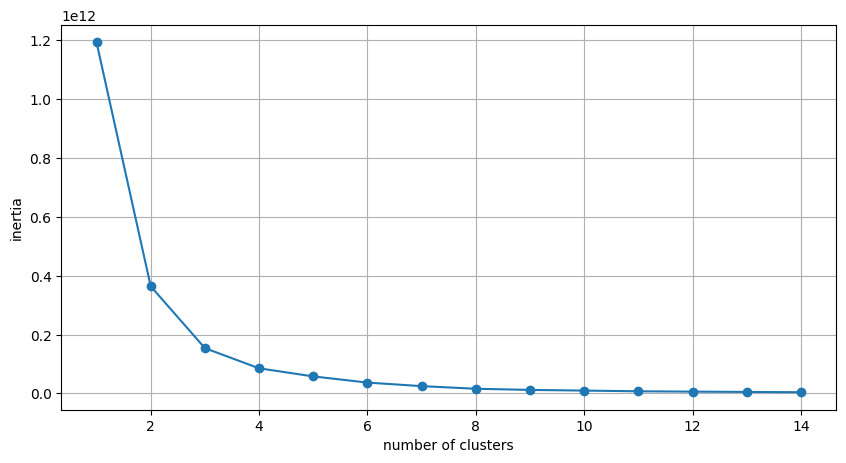

In [934]:
elbow_method(x_train, 15)

In [935]:
data_plot = data

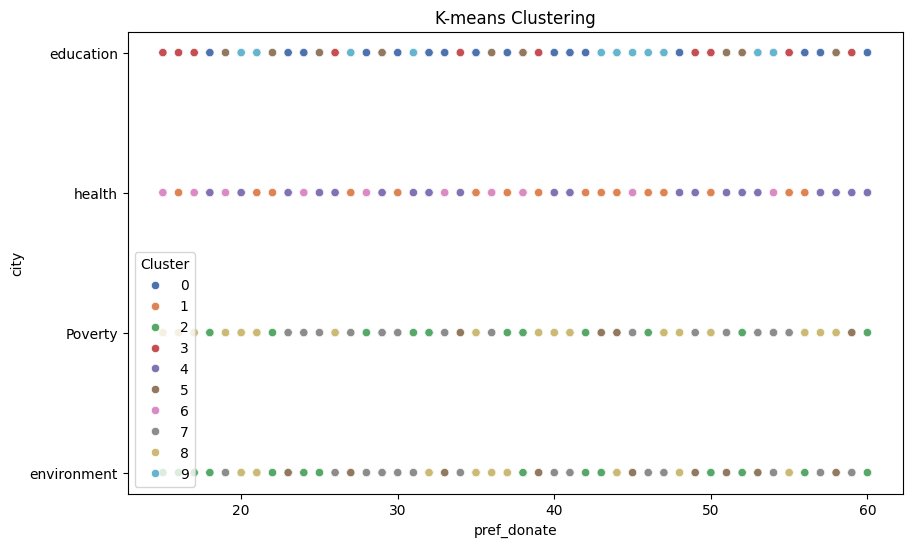

In [936]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10,  max_iter=300, tol=0.0001, random_state=42)
kmeans.fit(x_pca)

data_plot['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_plot, x=data_plot['age'], y=data_plot['pref_donate'], hue='Cluster', palette='deep', legend='full')
plt.title('K-means Clustering')
plt.xlabel('pref_donate')
plt.ylabel('city')
plt.show()

In [937]:
from sklearn.metrics import silhouette_score
result = kmeans.labels_
print(silhouette_score(x_pca, result))

0.9275898184031675


In [938]:
from sklearn.metrics import calinski_harabasz_score
result = kmeans.labels_
print(calinski_harabasz_score(x_pca, result))

132080.97515862985


In [939]:
from sklearn.metrics import davies_bouldin_score
result = kmeans.labels_
print(davies_bouldin_score(x_pca, result))

0.1798913741788814


In [940]:
cluster_data_dict = {}

for cluster_label in set(data_plot['Cluster']):
    cluster_data = data_plot[data_plot['Cluster'] == cluster_label]
    cluster_data_dict[cluster_label] = cluster_data

for cluster_label, cluster_data in cluster_data_dict.items():
    print(f'Cluster {cluster_label} Data:')
    print(cluster_data)

Cluster 0 Data:
      age            city pref_donate donate_type  donate_number  income  \
12     25        the lake   education        time             14    4500   
45     37  Kafr El-Sheikh   education        time             23    4500   
63     38           Aswan   education        time             20   16000   
81     29           Minya   education        time             52   10500   
118    42   Marsa Matrouh   education        time             54   25000   
...   ...             ...         ...         ...            ...     ...   
9944   24           Aswan   education        time             13    9500   
9955   32        Menoufia   education        time             25   10000   
9976   15           Asyut   education        time             17   22000   
9980   41           Cairo   education        time             21   25000   
9994   60    the shortest   education        time              2    4500   

      Cluster  
12          0  
45          0  
63          0  
81     

In [941]:
cluster_one = cluster_data_dict[0]
cluster_two = cluster_data_dict[1]
cluster_three = cluster_data_dict[2]
cluster_four =cluster_data_dict[3]

In [942]:
def statistic_method(clus_name):
  word_count = clus_name.value_counts()
  print(word_count)

In [943]:
statistic_method(cluster_one['pref_donate'])
print('\n')

statistic_method(cluster_one['donate_type'])

pref_donate
education    769
Name: count, dtype: int64


donate_type
time    769
Name: count, dtype: int64


In [944]:
statistic_method(cluster_two['pref_donate'])
print('\n')
statistic_method(cluster_two['donate_type'])


pref_donate
health    1471
Name: count, dtype: int64


donate_type
skills    1118
time       353
Name: count, dtype: int64


In [945]:
statistic_method(cluster_three['pref_donate'])
print('\n')
statistic_method(cluster_three['donate_type'])

pref_donate
Poverty        574
environment    557
Name: count, dtype: int64


donate_type
knowledge    1131
Name: count, dtype: int64


In [946]:
statistic_method(cluster_four['pref_donate'])
print('\n')
statistic_method(cluster_four['donate_type'])

pref_donate
education    717
Name: count, dtype: int64


donate_type
things    717
Name: count, dtype: int64
